# UFC Title Challenger Analysis

Mixed Martial Arts (MMA) is an exciting sport that is rabidly growing. The piloting global promotion for MMA is the Ultimate Fighting Championship (UFC) which was founded in 1993. As a fairly new sport, MMA doesn’t have deep roots compared to sports such as Baseball or Hockey. What is does have is uniqueness and excitement, MMA combines all of the martial arts, such as Boxing, Brazilian Jiu-Jitsu, Sambo, Wrestling, Muay Thai, Karate, and Judo into a single sport. 

The objective for a UFC fighter is to work their way through the rankings and become champion in their respective weight class. My goal for this analysis using the [UFC-Fight historical data from 1993 to 2019](https://www.kaggle.com/rajeevw/ufcdata) from kaggle is to answer the following questions: 
-	The average path for a title challenger in the UFC by weight class? (wins, losses, ect before they are rewarded a title fight)
-	What weight class is the most challenging to get a title fight in?
-	Do finishes leapfrog fighters into title contention faster?
-	Does experience matter?

Column definitions:
R_ and B_ prefix signifies red and blue corner fighter stats respectively
- _opp_ containing columns is the average of damage done by the opponent on the fighter
- KO is number of knockdowns
- SIG_STR is no. of significant strikes 'landed of attempted'
- SIG_STR_pct is significant strikes percentage
- TOTAL_STR is total strikes 'landed of attempted'
- TD is no. of takedowns
- TD_pct is takedown percentages
- SUB_ATT is no. of submission attempts
- PASS is no. times the guard was passed?
- HEAD is no. of significant strinks to the head 'landed of attempted'
- BODY is no. of significant strikes to the body 'landed of attempted'
- CLINCH is no. of significant strikes in the clinch 'landed of attempted'
- GROUND is no. of significant strikes on the ground 'landed of attempted'
- win_by is method of win
- last_round is last round of the fight (ex. if it was a KO in 1st, then this will be 1)
- last_round_time is when the fight ended in the last round
- Format is the format of the fight (3 rounds, 5 rounds etc.)
- Referee is the name of the Ref
- date is the date of the fight
- location is the location in which the event took place
- Fight_type is which weight class and whether it's a title bout or not
- Winner is the winner of the fight
- Stance is the stance of the fighter (orthodox, southpaw, etc.)
- Height_cms is the height in centimeter
- Reach_cms is the reach of the fighter (arm span) in centimeter
- Weight_lbs is the weight of the fighter in pounds (lbs)
- age is the age of the fighter
- title_bout Boolean value of whether it is title fight or not
- weight_class is which weight class the fight is in (Bantamweight, heavyweight, Women's flyweight, etc.)
- no_of_rounds is the number of rounds the fight was scheduled for
- current_lose_streak is the count of current concurrent losses of the fighter
- current_win_streak is the count of current concurrent wins of the fighter
- draw is the number of draws in the fighter's ufc career
- wins is the number of wins in the fighter's ufc career
- losses is the number of losses in the fighter's ufc career
- total_rounds_fought is the average of total rounds fought by the fighter
- total_time_fought(seconds) is the count of total time spent fighting in seconds
- total_title_bouts is the total number of title bouts taken part in by the fighter
- win_by_Decision_Majority is the number of wins by majority judges decision in the fighter's ufc career
- win_by_Decision_Split is the number of wins by split judges decision in the fighter's ufc career
- win_by_Decision_Unanimous is the number of wins by unanimous judges decision in the fighter's ufc career
- win_by_KO/TKO is the number of wins by knockout in the fighter's ufc career
- win_by_Submission is the number of wins by submission in the fighter's ufc career
- win_by_TKO_Doctor_Stoppage is the number of wins by doctor stoppage in the fighter's ufc career

### Importing libraries and cleaning the data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#importing UFC dataframe 
UFCD = pd.read_csv('UFCDATA.csv')
UFCD.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [4]:
UFCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


Since we are only looking at fighters who have had a title fight, we will narrow down the dataframe

In [5]:
# Focusing on title fights only (title challengers)
UFCD1 = UFCD[UFCD['title_bout'] == True]

For each column in the data, if it begins with 'R' it is the red corner, the red corner in this case is already the champion of that weight class therefore not a ‘challenger’. The blue corner is reserved for the lower ranked fighter in this case the challenger. Also removing several irrelevant columns for this analysis.

In [6]:
RED = [col for col in UFCD1 if col.startswith('R') or col.startswith('B_avg')]

In [7]:
# dropping RED and also dropping a few redundant columns (all title fights are 5 rds, ect)
UFCD1.drop(RED,axis=1,inplace = True)
UFCD1.drop(['title_bout', 'no_of_rounds'],axis=1,inplace = True)

C:\Users\brock\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [8]:
# renaming all columns removing B_
for col in UFCD1:
    if col.startswith('B_'):
        UFCD1.rename(columns= {col:col[2:]},inplace=True)

C:\Users\brock\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [9]:
UFCD1.head()

,fighter,date,location,Winner,weight_class,current_lose_streak,current_win_streak,draw,longest_win_streak,losses,...,win_by_Decision_Unanimous,win_by_KO/TKO,win_by_Submission,win_by_TKO_Doctor_Stoppage,wins,Stance,Height_cms,Reach_cms,Weight_lbs,age
0,Marlon Moraes,2019-06-08,"Chicago, Illinois, USA",Red,Bantamweight,0.0,4.0,0.0,4.0,1.0,...,0.0,2.0,1.0,0.0,4.0,Orthodox,167.64,170.18,135.0,31.0
1,Jessica Eye,2019-06-08,"Chicago, Illinois, USA",Red,Women's Flyweight,0.0,3.0,0.0,3.0,6.0,...,1.0,0.0,0.0,1.0,4.0,Orthodox,167.64,167.64,125.0,32.0
38,Jessica Andrade,2019-05-11,"Rio de Janeiro, Rio de Janeiro, Brazil",Blue,Women's Strawweight,0.0,3.0,0.0,3.0,4.0,...,5.0,2.0,2.0,0.0,10.0,Orthodox,154.94,157.48,115.0,27.0
86,Dustin Poirier,2019-04-13,"Atlanta, Georgia, USA",Blue,Lightweight,0.0,3.0,0.0,4.0,5.0,...,4.0,8.0,3.0,0.0,16.0,Southpaw,175.26,182.88,155.0,30.0
87,Israel Adesanya,2019-04-13,"Atlanta, Georgia, USA",Blue,Middleweight,0.0,5.0,0.0,5.0,0.0,...,2.0,2.0,0.0,0.0,5.0,Switch,193.04,203.20,185.0,29.0


In the early days of the UFC (1993-2000) there were several rapid changes as the sport was growing, for example in 1993 there were no weight classes, rounds, or judges. The only three rules were, no biting, no eye gouging, and no groin shots. Although MMA is a rough sport there is much more sophistication in the modern era of the UFC, which began in 2001 when the company Zuffa purchased the UFC. This keeps the data within 20 years of today and creates a more accurate representation of the sport currently.

In [10]:
UFCD2 = UFCD1[UFCD1['date'] >= '2001-01-01']

I decided to remove two weight classes from the current total of 12. Woman’s Flyweight and Woman’s Featherweight are brand new weight classes introduced post 2016, with such little data I felt they should be removed.

Weight Class Break Down

Mens
- Flyweight                 125LBS
- Bantamweight              135LBS
- Featherweight             145LBS
- Lightweight               155LBS
- Welterweight              170LBS
- Middleweight              185LBS
- Light HeavyWeight         205LBS
- Heavyweight               265LBS

Womans
- Women's Strawweight       115LBS
- Women's Flyweight         125LBS
- Women's Bantamweight      135LBS
- Women's Featherweight     145LBS

In [11]:
#less then 10 title fights 
UFCD2['weight_class'].value_counts() > 10

Welterweight              True
Light Heavyweight         True
Heavyweight               True
Middleweight              True
Lightweight               True
Bantamweight              True
Featherweight             True
Flyweight                 True
Women's Bantamweight      True
Women's Strawweight       True
Women's Featherweight    False
Women's Flyweight        False
Name: weight_class, dtype: bool

In [12]:
UFCD3 = UFCD2[(UFCD2['weight_class'] != "Women's Flyweight") & (UFCD2['weight_class'] != "Women's Featherweight")]

In [13]:
# Converted cms into inches as that universally is the UFC measuring system
# Also changed time fought from seconds to minutes for easy interpretation
UFCD3['height_inches'] = UFCD3['Height_cms'] / 2.54
UFCD3['reach_inches'] = UFCD3['Reach_cms'] / 2.54 
UFCD3['time_fought(minutes)'] = UFCD3['total_time_fought(seconds)'] / 60
#Dropped old columns
UFCD3.drop(['Height_cms','Reach_cms'],axis=1,inplace=True)

C:\Users\brock\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\brock\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\brock\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [14]:
# removing caps from a few columns
UFCD3.rename(columns = {'Weight_lbs':'weight_lbs','win_by_Submission':'wins_SUB', 'Winner':'winner','Stance':'stance'}, inplace=True)

After filtering fighters who gained a title shot with 0 UFC fights, I discovered this data includes some fighter accolades such as The Ultimate Fighter (TV Show Contest) wins as "title bouts", which doesn't make sense to keep for my goals for this analysis.

In [15]:
UFCD4 = UFCD3[UFCD3['wins'] != 0]

### Adding new features

Instead of wins by KO and doctor stoppage (TKO) I combine them to create a KO/TKO fight finish column, I do the same with the various types of decision victories.

In [16]:
# making new columns, adding all KOs together and types of dec together
UFCD4['wins_KO/TKO'] = UFCD4['win_by_TKO_Doctor_Stoppage'] + UFCD4['win_by_KO/TKO']
UFCD4['wins_DEC'] = UFCD4['win_by_Decision_Majority'] + UFCD4['win_by_Decision_Split'] + UFCD4['win_by_Decision_Unanimous']

C:\Users\brock\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\brock\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# dropping the columns used to create the new ones, as well as a few other columns including draws and title bouts
drop_list = ['win_by_Decision_Majority','win_by_Decision_Split',
             'win_by_Decision_Unanimous','win_by_TKO_Doctor_Stoppage',
            'win_by_KO/TKO','total_title_bouts','draw',]
UFCD4.drop(drop_list,axis = 1,inplace = True)

I decide to remove fighters with multiple title shots from the data only keeping their first entry, this avoids repeated data. I also add a finishes column, adding a fighters total Knockout and Submission wins.

In [18]:
UFCD4['fighter'].drop_duplicates(keep='first',inplace= True)

C:\Users\brock\Anaconda3\lib\site-packages\pandas\core\base.py:1241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self._update_inplace(result)


In [19]:
# add finishes column
UFCD4['wins_finish'] = UFCD4['wins_KO/TKO'] + UFCD4['wins_SUB']

C:\Users\brock\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Now the cleaned data frame by column definition:
- fighter is the fighter by first and last name
- weight_class is which weight class the fight is in (Bantamweight, heavyweight, Women's Strawweight, etc.)
- winner is the winner of the fight
- stance is the stance of the fighter (orthodox, southpaw, etc.)
- height_inches is the height in inches
- reach_inches is the reach of the fighter (arm span) in inches
- weight_lbs is the weight of the fighter in pounds (lbs)
- age is the age of the fighter
- current_lose_streak is the count of current concurrent losses of the fighter
- current_win_streak is the count of current concurrent wins of the fighter
- wins is the number of wins in the fighter's ufc career
- losses is the number of losses in the fighter's ufc career
- total_rounds_fought is the average of total rounds fought by the fighter - - 
- wins_DEC is the number of wins by judges decision in the fighter's ufc career
- wins_KO/TKO is the total number of wins by knockout in the fighter's ufc career
- wins_SUB is the number of wins by submission in the fighter's ufc career
- wins_finish is the total number of wins by finish (SUB,KO,TKO) in the fighter's UFC career.

### Visual Analysis

A look at the wins required to earn a title shot in the UFC

C:\Users\brock\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


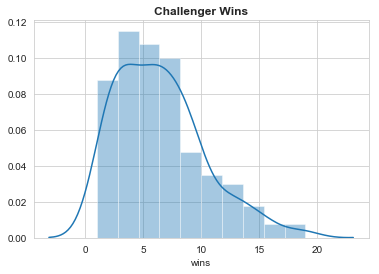

In [20]:
sns.distplot(UFCD4['wins'],bins=10)
plt.title('Challenger Wins',fontsize= 12,fontweight='bold')
plt.show()

With a positive data skew, it appears most UFC fights must win 4 - 8 fights to earn a UFC title shot. Let’s take a look at longest win streaks before acquiring a title shot.

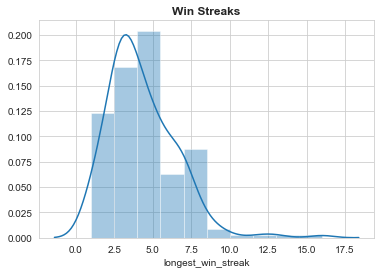

In [21]:
sns.distplot(UFCD4['longest_win_streak'],bins = 10)
plt.title('Win Streaks',fontsize= 12,fontweight='bold')
plt.show()

It appears most fighters are coming in with at least a 3-5 fight win streak. These numbers make sense looking at the averages for wins and longest win streak.

In [22]:
UFCD4[['wins','longest_win_streak']].mean()

wins                  6.427928
longest_win_streak    4.283784
dtype: float64

#### What Weight Class is the Most Difficult to get a Title Shot in? 

A look at the average wins and losses for the UFC title contenders by weight class.

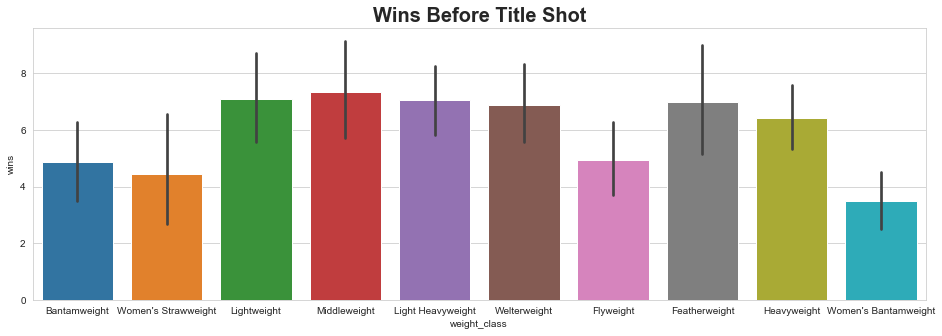

In [23]:
plt.figure(figsize = (16,5))
sns.barplot(x='weight_class',y='wins',data= UFCD4)
plt.title('Wins Before Title Shot',fontsize= 20,fontweight='bold')
plt.show()

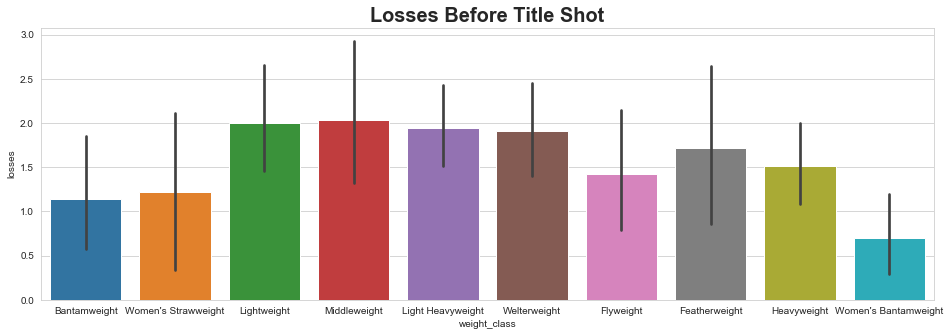

In [24]:
plt.figure(figsize = (16,5))
sns.barplot(data = UFCD4,x='weight_class',y='losses')
plt.title('Losses Before Title Shot',fontsize= 20,fontweight='bold')
plt.show()

It seems Middleweight has both the highest average wins and losses before a title fight.

In [25]:
UFCD4.groupby('weight_class')['wins'].mean().sort_values(ascending=False)

weight_class
Middleweight            7.357143
Lightweight             7.076923
Light Heavyweight       7.054054
Featherweight           7.000000
Welterweight            6.885714
Heavyweight             6.428571
Flyweight               4.928571
Bantamweight            4.857143
Women's Strawweight     4.444444
Women's Bantamweight    3.500000
Name: wins, dtype: float64

In [26]:
UFCD4.groupby('weight_class')['losses'].mean().sort_values(ascending=False)

weight_class
Middleweight            2.035714
Lightweight             2.000000
Light Heavyweight       1.945946
Welterweight            1.914286
Featherweight           1.714286
Heavyweight             1.514286
Flyweight               1.428571
Women's Strawweight     1.222222
Bantamweight            1.142857
Women's Bantamweight    0.700000
Name: losses, dtype: float64

To truly see the weight class with the highest difficultly in terms of wins and losses, I must look at the win loss differential for each weight class.

In [27]:
win_loss_dif = UFCD4.groupby('weight_class')['wins'].mean() - UFCD4.groupby('weight_class')['losses'].mean()
win_loss_dif.sort_values(ascending = False)

weight_class
Middleweight            5.321429
Featherweight           5.285714
Light Heavyweight       5.108108
Lightweight             5.076923
Welterweight            4.971429
Heavyweight             4.914286
Bantamweight            3.714286
Flyweight               3.500000
Women's Strawweight     3.222222
Women's Bantamweight    2.800000
dtype: float64

In [28]:
UFCD4['win/loss_diff'] = UFCD4['wins'] - UFCD4['losses']

C:\Users\brock\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


It appears that Middle weight still holds strong at the highest win loss differential however we did see some changes in other weight classes. 

Next I will look to see over time if the win/loss differential for title challengers has changed

In [29]:
#Setting date as a datetime variable 
UFCD4['date'] = pd.to_datetime(UFCD4['date'])
UFCD4['date']= UFCD4['date'].apply(lambda t: t.date())

C:\Users\brock\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\brock\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


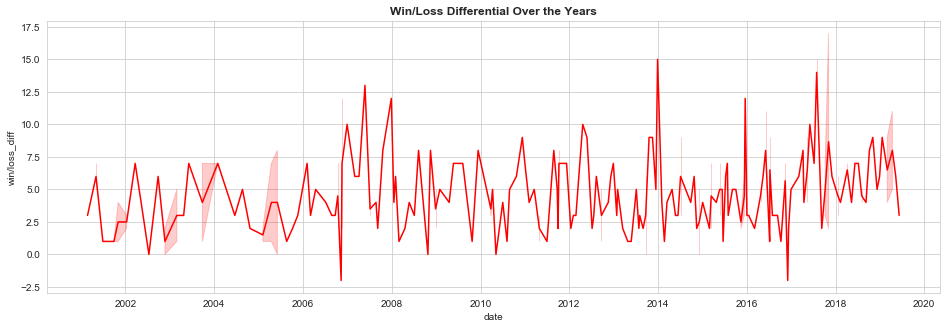

In [30]:
plt.figure(figsize = (16,5))
sns.lineplot(x='date',y='win/loss_diff',data=UFCD4,color='r')
plt.title('Win/Loss Differential Over the Years',fontsize= 12,fontweight='bold')
plt.show()

It's interesting, despite all the changes made the win loss differential has remained fairly similar over the years, with a slight increasing trend.


Next, I will explore how title challengers are doing in their fights versus the champion.

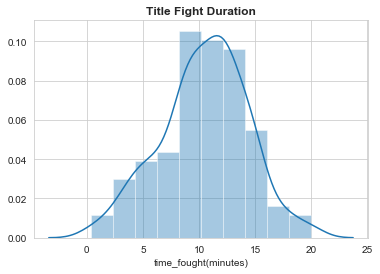

In [83]:
sns.distplot(UFCD4['time_fought(minutes)'],bins = 10)
plt.title('Title Fight Duration',fontsize= 12,fontweight='bold')
plt.show()

Generally fighters are lasting 8-12 minutes with the champion, meaning many fights are getting finished.

Let's look at the how long the fight is lasting based on the winner of the fight.

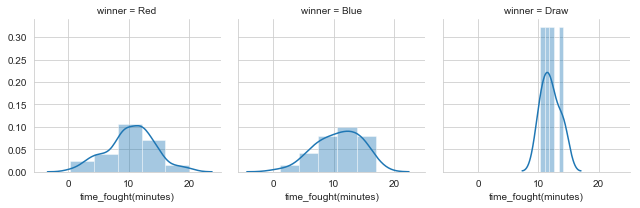

In [88]:
w = sns.FacetGrid(data=UFCD4,col='winner')
w.map(sns.distplot,'time_fought(minutes)',bins=5)
plt.show()

It appears for the most part if the current champion (red) wins the fight it typically lasts 10 minutes, if the challenger is wins (blue) the fight goes longer in the 12-15 minute range. 

Next we will see who is winning the fight more often, challanger or champion per weight class.

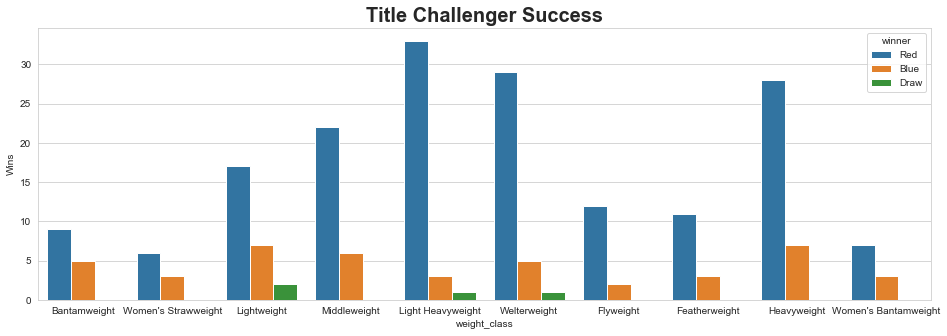

In [118]:
plt.figure(figsize = (16,5))
sns.countplot(x ='weight_class',data=UFCD4, hue='winner')
plt.title('Title Challenger Success',fontsize= 20,fontweight='bold')
plt.ylabel('Wins')
plt.show()

In summary it seems Middle weight requires the best win / loss differential to earn a title shot. However, Light Heavyweight appears to be the most difficult weight class for challengers to beat the champion. Regardless of the weight class challengers have a tough time defeating the champion.

#### How Important is Expirence in Earning and Wnning a Title Fight in the UFC?

Plotting the average age of a UFC title challenger

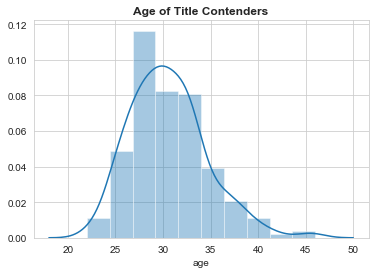

In [125]:
sns.distplot(UFCD4['age'],bins=10)
plt.title('Age of Title Contenders',fontsize= 12,fontweight='bold')
plt.show()

In [126]:
UFCD4.groupby('age')['age'].count().sort_values(ascending = False).head()

age
30.0    25
33.0    23
27.0    22
29.0    21
32.0    20
Name: age, dtype: int64

It appears the average age is from 27-33, which is generally in the athletic peak for most athletes. Let’s look at the average age of title challengers by weight class.

In [33]:
UFCD4.groupby('weight_class')['age'].mean().sort_values()

weight_class
Women's Strawweight     28.444444
Bantamweight            28.857143
Featherweight           28.928571
Flyweight               28.928571
Lightweight             29.153846
Welterweight            30.114286
Women's Bantamweight    30.400000
Heavyweight             31.771429
Light Heavyweight       31.945946
Middleweight            32.321429
Name: age, dtype: float64

It looks as expected, no surprises in terms of age by weight class, all stay in the 27-33 range.

Let’s take a deeper look in a more sport specific way, plotting the success of title challengers based on their total rounds fought before a title fight (Blue indicates the challenger won and red indicates the champion won).

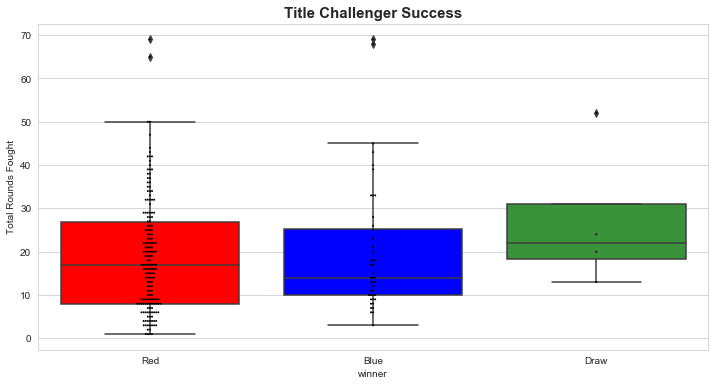

In [34]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(data=UFCD4,x='winner', y='total_rounds_fought')
sns.swarmplot(x="winner", y="total_rounds_fought", data=UFCD4,
              size=2, color='black')
plt.title('Title Challenger Success',fontsize= 15,fontweight='bold')
ax.set_ylabel('Total Rounds Fought')
mybox1 = ax.artists[0]
mybox1.set_facecolor('red')
mybox2 = ax.artists[1]
mybox2.set_facecolor('blue')

Generally, it seems title challengers with less total rounds have a slightly better chance at winning. This is an interesting stat for title challengers who won, in the nature of this sport too much fight experience can mean more damage to the fighter’s body. Rendering them worse off or susceptible to injury in future fights. However, another point to note is fighters with fewer total rounds are finishing their fights quicker and more dominantly.

Text(0, 0.5, 'Total Rounds Fought')

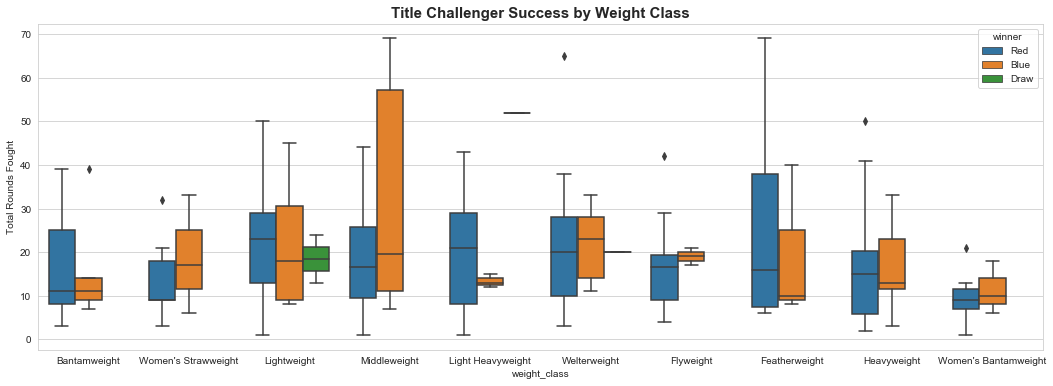

In [127]:
#By weight class
plt.figure(figsize = (18,6))
ax = sns.boxplot(data=UFCD4,x='weight_class', y='total_rounds_fought',hue='winner')
plt.title('Title Challenger Success by Weight Class',fontsize= 15,fontweight='bold')
ax.set_ylabel('Total Rounds Fought')

It appears that the rounds fought is dependant on weight class, Middleweight, Woman's Strawweight, Woman’s Bantamweight Lightweight and Heavyweight all reward fight experience prior to fighting for the title.

To discover if experience in terms of losses is important, I will plot the number of challengers who won without a loss prior vs the number of challengers who won with a loss prior to their title fight.

In [36]:
UFCD4[(UFCD4['losses'] >= 1) & (UFCD4['winner'] == 'Blue')]['fighter'].count()

30

In [37]:
UFCD4[(UFCD4['losses'] < 1) & (UFCD4['winner'] == 'Blue')]['fighter'].count()

14

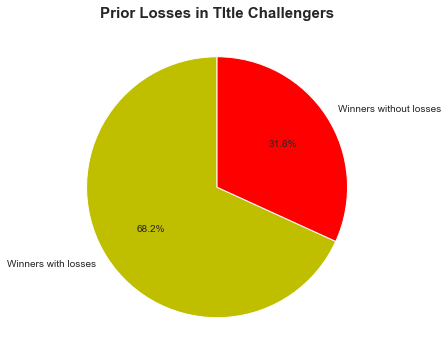

In [38]:
# Quick pie chart construction
wins = [30, 14]
UFClabels = ['Winners with losses','Winners without losses']
colors = ['y', 'r']
plt.figure(figsize = (6,6))
plt.pie(wins, labels=UFClabels, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Prior Losses in TItle Challengers',fontsize= 15,fontweight='bold')
plt.show()

Out of the title challengers who've won, fighters with 1 or more losses make out 68.2% of those winners. This could be due to the fact fighters who experience a loss learn their flaws and mistakes early on are able to correct and improve before they fight for the title.

In [63]:
UFCD4[(UFCD4['current_lose_streak'] >=1) & (UFCD4['winner'] == 'Blue')]

,fighter,date,location,winner,weight_class,current_lose_streak,current_win_streak,longest_win_streak,losses,total_rounds_fought,...,wins,stance,weight_lbs,age,height_inches,reach_inches,wins_KO/TKO,wins_DEC,wins_finish,win/loss_diff
1932,Daniel Cormier,2015-05-23,"Las Vegas, Nevada, USA",Blue,Light Heavyweight,1.0,0.0,4.0,1.0,15.0,...,4.0,Orthodox,235.0,36.0,71.0,72.0,1.0,2.0,2.0,3.0
3803,Mauricio Rua,2010-05-08,"Montreal, Quebec, Canada",Blue,Light Heavyweight,1.0,0.0,2.0,2.0,12.0,...,2.0,Orthodox,205.0,28.0,73.0,76.0,2.0,0.0,2.0,0.0


An interesting note, only two UFC fighters have won their first title fight coming off a loss.

#### Do Finishes Leap Frog Fighters Into Title Contention Sooner? 

Let's take a took at wins vs wins finished

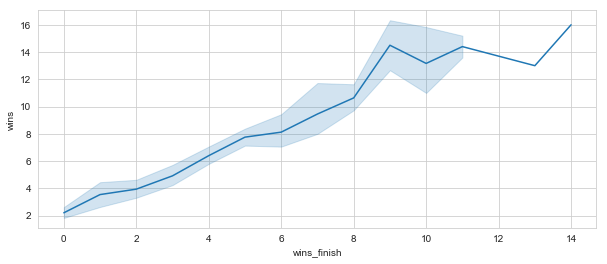

In [39]:
plt.figure(figsize=(10,4))
sns.lineplot(data = UFCD4,x='wins_finish', y= 'wins')

It appears as wins go up so do wins by finish, also that most of the wins from contenders in the UFC tend to be finishes, which makes sense, wins by finishes indicate dominance and skill, common quailities of a championship contender. 

Lets look at this same data by weight class

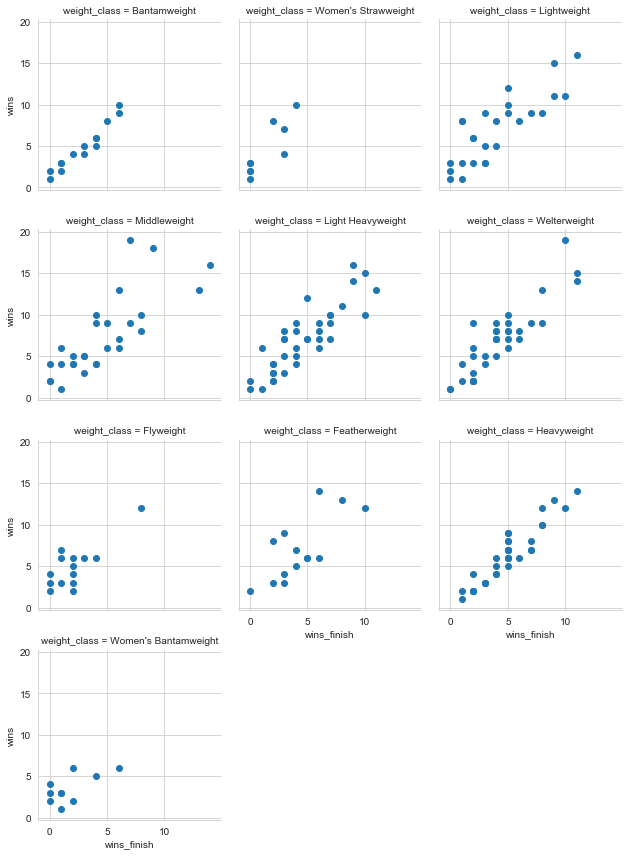

In [128]:
u = sns.FacetGrid(data=UFCD4, col = 'weight_class',col_wrap =3)
u.map(plt.scatter,'wins_finish','wins',)

In [41]:
UFCD4.groupby('weight_class')['wins','wins_finish'].mean().sort_values(by='wins_finish')

,wins,wins_finish
weight_class,,
Women's Strawweight,4.444444,1.333333
Women's Bantamweight,3.500000,1.700000
Flyweight,4.928571,2.000000
Bantamweight,4.857143,2.857143
Lightweight,7.076923,4.038462
Welterweight,6.885714,4.257143
Featherweight,7.000000,4.357143
Middleweight,7.357143,4.571429
Light Heavyweight,7.054054,4.675676


It appears for smaller weight classes such as Woman's Strawweight, Woman's Bantamweight, Men's Flyweight and Men's Bantamweight the finishing rate in title contender victories is much lower. This could possibly be due to the fact that a smaller fighter doesn't have as much size and strength to finish their oppoents. For example, Heavyweights have the highest finishing rate out of their wins, as 265LB fighters their movments pack a lot more force.

#### An overall break down of the average UFC title challenger by weight class

In [53]:
UFCD4.groupby('weight_class').mean()

,current_lose_streak,current_win_streak,longest_win_streak,losses,total_rounds_fought,wins_SUB,wins,weight_lbs,age,height_inches,reach_inches,wins_KO/TKO,wins_DEC,wins_finish,win/loss_diff
weight_class,,,,,,,,,,,,,,,
Bantamweight,0.071429,2.357143,3.785714,1.142857,16.000000,1.214286,4.857143,132.857143,28.857143,66.500000,67.500000,1.642857,2.000000,2.857143,3.714286
Featherweight,0.214286,3.642857,5.142857,1.714286,23.857143,1.571429,7.000000,148.928571,28.928571,67.928571,70.071429,2.785714,2.642857,4.357143,5.285714
Flyweight,0.214286,2.642857,3.071429,1.428571,17.142857,0.428571,4.928571,129.285714,28.928571,64.285714,65.142857,1.571429,2.928571,2.000000,3.500000
Heavyweight,0.142857,2.771429,4.657143,1.514286,16.400000,0.885714,6.428571,246.800000,31.771429,75.028571,77.633333,4.142857,1.342857,5.028571,4.914286
Light Heavyweight,0.135135,2.837838,4.405405,1.945946,20.270270,1.216216,7.054054,203.378378,31.945946,73.648649,75.675676,3.459459,2.378378,4.675676,5.108108
Lightweight,0.115385,3.038462,4.346154,2.000000,22.115385,1.538462,7.076923,156.153846,29.153846,68.807692,71.384615,2.500000,3.038462,4.038462,5.076923
Middleweight,0.071429,3.285714,4.892857,2.035714,21.464286,1.142857,7.357143,184.285714,32.321429,72.678571,74.884615,3.428571,2.750000,4.571429,5.321429
Welterweight,0.171429,3.428571,4.285714,1.914286,20.914286,1.314286,6.885714,170.428571,30.114286,70.571429,72.967742,2.942857,2.628571,4.257143,4.971429
Women's Bantamweight,0.100000,2.400000,3.000000,0.700000,10.200000,0.700000,3.500000,136.000000,30.400000,66.400000,67.000000,1.000000,1.800000,1.700000,2.800000


This concludes of analysis title contenders in the UFC